In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [37]:
warnings.filterwarnings('ignore')

In [38]:
df_meta = pd.read_parquet('combined_metadata.parquet')
df_rev = pd.read_parquet('combined_california.parquet')

# Índice

1. [Chequeo de nulos](#chequeo-de-nulos)
2. [Valores duplicados](#valores-duplicados)
3. [Valores faltantes](#valores-faltantes)
4. [Tipos de datos](#tipos-de-datos)
5. [Análisis Outlier](#analisis-outlier)
6. [Análisis estadístico de datos](#analisis-estadistico-de-datos)

### Chequeo de nulos

In [39]:
df_meta.isnull().sum()

name                    0
address               213
gmap_id                 0
description         63264
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               53228
hours               12426
MISC                  559
state               11803
relative_results    21296
url                     0
dtype: int64

La cantidad de nulos en el dataset segun cada columna representa el 65.05% en description, el 54.73% en price, el 21.90% en relative results, el 12.78% en hours, el 12.14% en state, el 0.57% en MISC y 0.22% en address con respecto al total de registros.

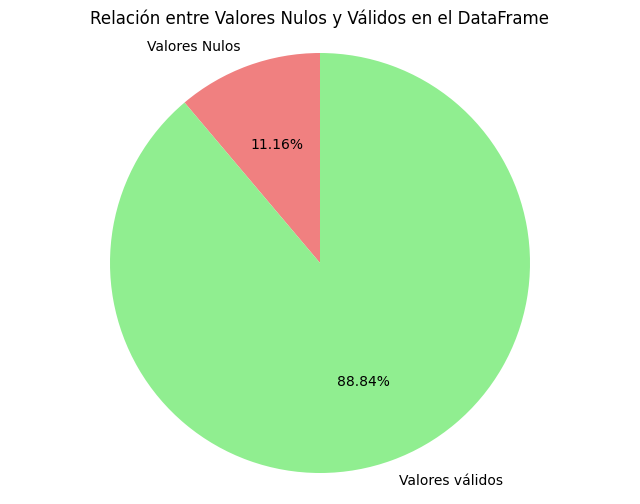

Total de valores nulos: 162789
Total de valores: 1458855
Porcentaje de valores nulos: 11.16%


name                    0
address               213
gmap_id                 0
description         63264
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               53228
hours               12426
MISC                  559
state               11803
relative_results    21296
url                     0
dtype: int64

In [40]:
# Número total de valores nulos en el DataFrame
total_nulos = df_meta.isnull().sum().sum()

# Número total de valores en el DataFrame
total_valores = df_meta.size

# Porcentaje de valores nulos
porcentaje_nulos = (total_nulos / total_valores) * 100

# Crear una lista de valores para el gráfico de torta
valores = [total_nulos, total_valores - total_nulos]
etiquetas = ['Valores Nulos', 'Valores válidos']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.2f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Relación entre Valores Nulos y Válidos en el DataFrame')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de valores: {total_valores}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

df_meta.isnull().sum()

El dataset tiene un 11.16% de valores nulos distribuidos en varias columnas. Este porcentaje es manejable, pero aún debe ser abordado adecuadamente para evitar sesgos en el análisis.

In [41]:
df_meta['address'].fillna('', inplace=True)
df_meta['description'].fillna('', inplace=True)
df_meta['price'].fillna('', inplace=True)
df_meta['hours'] = df_meta['hours'].apply(lambda x: x if isinstance(x, list) else [])
df_meta['MISC'].fillna({}, inplace=True)
df_meta['state'].fillna('', inplace=True)
df_meta['relative_results'] = df_meta['relative_results'].apply(lambda x: x if isinstance(x, list) else [])

Se implementaron diversas estrategias para manejar los valores nulos en el dataset basado en la naturaleza y relevancia de cada columna.

In [42]:
df_rev.isnull().sum()

user_id         0
name            0
time            0
rating          0
text       159673
pics       354532
resp       348278
gmap_id         0
dtype: int64

La cantidad de nulos en el dataset segun cada columna representa el 95.92% en pics, el94.23% en resp y el 43.20% en text con respecto al total de registros

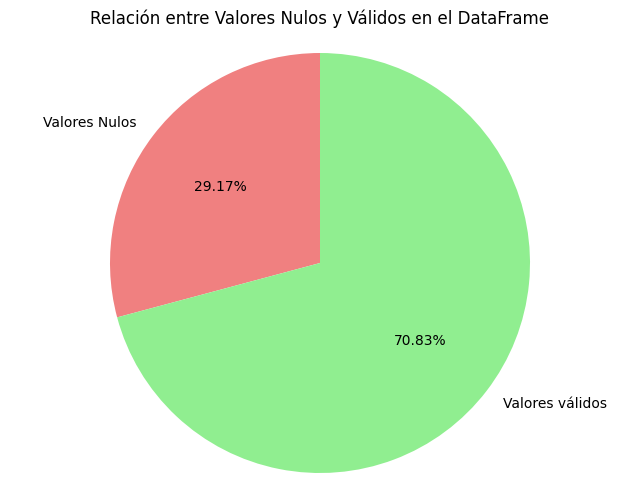

Total de valores nulos: 862483
Total de valores: 2956888
Porcentaje de valores nulos: 29.17%


user_id         0
name            0
time            0
rating          0
text       159673
pics       354532
resp       348278
gmap_id         0
dtype: int64

In [43]:
# Número total de valores nulos en el DataFrame
total_nulos = df_rev.isnull().sum().sum()

# Número total de valores en el DataFrame
total_valores = df_rev.size

# Porcentaje de valores nulos
porcentaje_nulos = (total_nulos / total_valores) * 100

# Crear una lista de valores para el gráfico de torta
valores = [total_nulos, total_valores - total_nulos]
etiquetas = ['Valores Nulos', 'Valores válidos']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.2f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Relación entre Valores Nulos y Válidos en el DataFrame')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de valores: {total_valores}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

df_rev.isnull().sum()

Aunque un 29.17% de datos nulos puede presentar desafíos para el análisis, es manejable con estrategias adecuadas de manejo de datos. Este porcentaje también proporciona una visión valiosa sobre los hábitos de los usuarios y las áreas en las que se puede mejorar la recolección de datos para futuros análisis.

In [44]:
df_rev['text'].fillna('', inplace=True)
df_rev['pics'] = df_rev['pics'].apply(lambda x: x if isinstance(x, list) else [])
df_rev['resp'].fillna({}, inplace=True)

Las estrategias implementadas para manejar los valores nulos se basan en la preservación de la mayor cantidad de datos posible y la preparación del dataset para análisis posteriores.

### Valores duplicados

In [45]:
columns_to_convert = ['category', 'hours', 'MISC', 'relative_results']
df_meta[columns_to_convert] = df_meta[columns_to_convert].applymap(str)

In [46]:
df_meta.duplicated().sum()

519

In [47]:
df_meta.drop_duplicates(inplace=True)

In [48]:
columns_to_convert = ['pics', 'resp']
df_rev[columns_to_convert] = df_rev[columns_to_convert].applymap(str)

In [49]:
df_rev.duplicated().sum()

16052

In [50]:
df_rev.drop_duplicates(inplace=True)

Se decide eliminar los valores duplicados.

### Tipos de datos

In [51]:
print(df_meta.dtypes)

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


In [52]:
print(df_rev.dtypes)

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object


Se puede observar que los tipos de datos son correspondientes con los valores de las columnas.

### Analisis Outlier

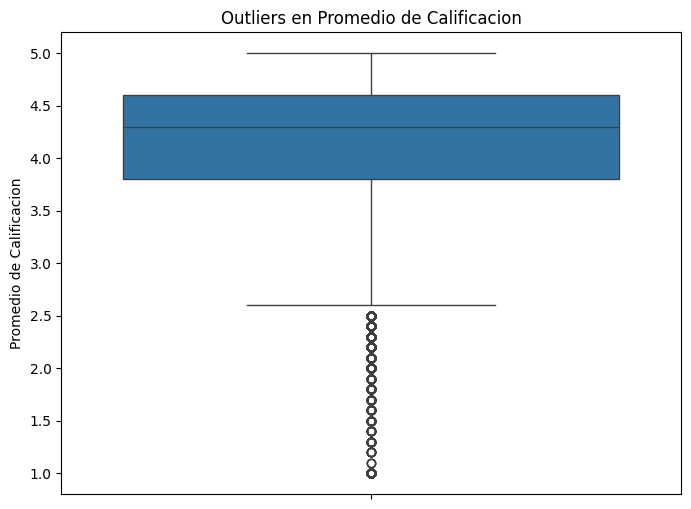

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_meta['avg_rating'])
plt.title('Outliers en Promedio de Calificacion')
plt.ylabel('Promedio de Calificacion')
plt.show()

In [54]:
Q1  = df_meta['avg_rating'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_meta['avg_rating'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_meta['avg_rating'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_meta['avg_rating'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_meta['avg_rating'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q3 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)
data = df_meta[['avg_rating']]
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print('Cantidad de Outliers: ', df_meta[outliers].shape[0])

Primer Cuartil:  3.8
Tercer Cuartil:  4.6
Rango Intercuartil:  0.7999999999999998
Mediana:  4.3
Valor minimo:  1.0
Valor maximo:  5.0
Bigote inferior:  2.6
Bigote superior:  5.799999999999999
Cantidad de Outliers:  1997


Podemos observar que las reseñas con valores por debajo de 2.6 son muy pocos ocupando menos del 2% de los datos. Esto se da porque los clientes estan mas inclinados a realizar reseñas cuando el servicio es de mejor calidad que cuando es ineficiente.

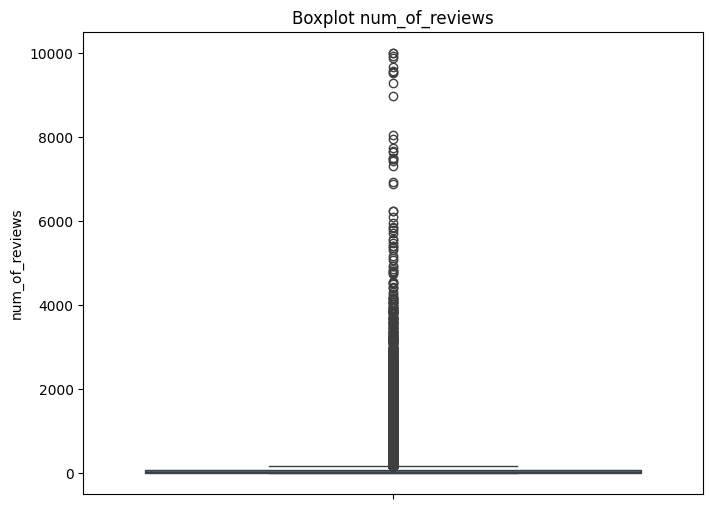

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_meta['num_of_reviews'])
plt.title('Boxplot num_of_reviews')
plt.show()

In [56]:
Q1  = df_meta['num_of_reviews'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_meta['num_of_reviews'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_meta['num_of_reviews'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_meta['num_of_reviews'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_meta['num_of_reviews'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q3 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)
data = df_meta[['num_of_reviews']]
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print('Cantidad de Outliers: ', df_meta[outliers].shape[0])

Primer Cuartil:  15.0
Tercer Cuartil:  78.0
Rango Intercuartil:  63.0
Mediana:  37.0
Valor minimo:  1
Valor maximo:  9998
Bigote inferior:  -79.5
Bigote superior:  172.5
Cantidad de Outliers:  10223


Podemos observar que los outliers existen desde el bigote superior de 172.5 y que llegan a ser alrededor del 10% del total de registros. Esto no esta mal porque los restaurants que estan muy por encima son franquicias muy grandes que reciben grandes cantidades de clientes al dia.

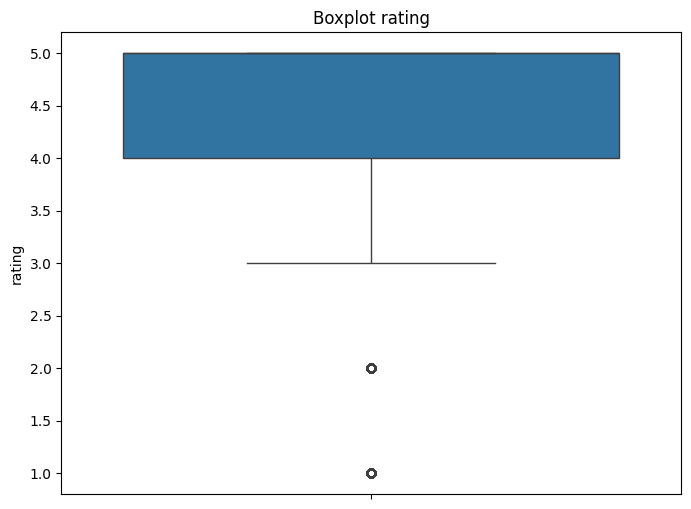

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(df_rev['rating'])
plt.title('Boxplot rating')
plt.show()

In [58]:
Q1  = df_rev['rating'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_rev['rating'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_rev['rating'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_rev['rating'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_rev['rating'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q3 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)
data = df_rev[['rating']]
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print('Cantidad de Outliers: ', df_rev[outliers].shape[0])


Primer Cuartil:  4.0
Tercer Cuartil:  5.0
Rango Intercuartil:  1.0
Mediana:  5.0
Valor minimo:  1
Valor maximo:  5
Bigote inferior:  2.5
Bigote superior:  6.5
Cantidad de Outliers:  31331


Podemos observar que las reseñas con valores por debajo de 2.5 son muy pocos ocupando menos del 10% de los datos. Esto se da porque los usuarios estan mas inclinados a realizar reseñas cuando el servicio es de mejor calidad que cuando es ineficiente.

### Analisis estadisticos de datos

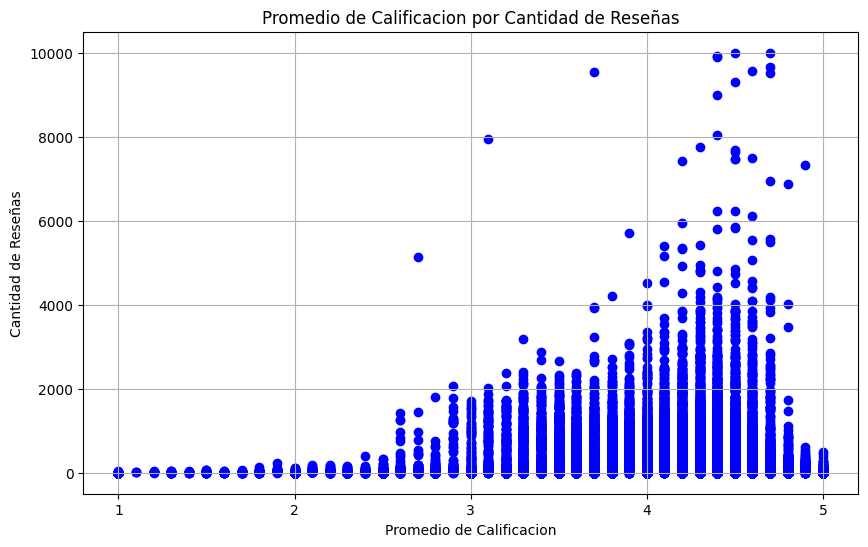

avg_rating
5.0    4577
4.9    3118
4.8    5170
4.7    6161
4.6    7025
4.5    7602
4.4    7487
4.3    7427
4.2    6607
4.1    5954
4.0    6379
3.9    4680
3.8    4240
3.7    3613
3.6    2837
3.5    2470
3.4    1977
3.3    1897
3.2    1129
3.1     971
3.0    1443
2.9     613
2.8     550
2.7     447
2.6     367
2.5     416
2.4     231
2.3     279
2.2     140
2.1      98
2.0     275
1.9      61
1.8      74
1.7      52
1.6      37
1.5      45
1.4      18
1.3      33
1.2       9
1.1       3
1.0     226
Name: count, dtype: int64


In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(df_meta['avg_rating'], df_meta['num_of_reviews'], color='b')
plt.xlabel('Promedio de Calificacion')
plt.ylabel('Cantidad de Reseñas')
plt.title('Promedio de Calificacion por Cantidad de Reseñas')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

# Contar la cantidad de restaurantes según su calificación
reviews_by_stars = df_meta['avg_rating'].value_counts().sort_index(ascending=False)

# Mostrar el resultado
print(reviews_by_stars)

En este grafico se puede observar que existe una gran cantidad de reseñas entre 3.5 y 4.5 estrellas y tambien da a entender que los usuarios no dejan muchas reseñas negativas.

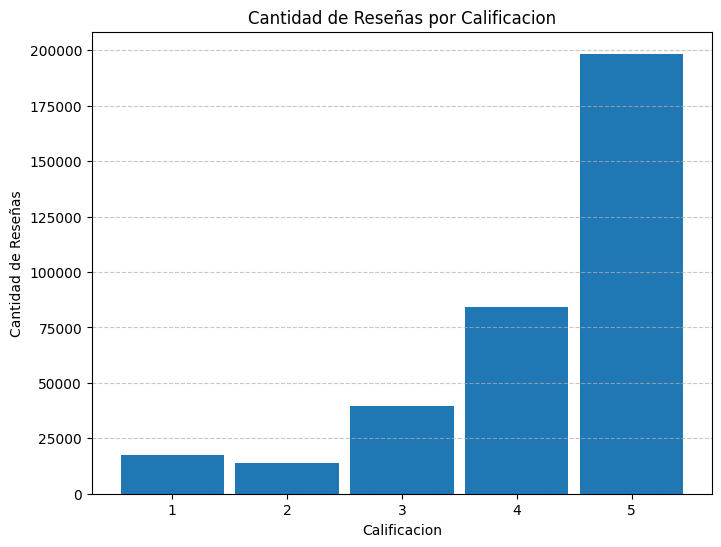

rating
5    198424
4     84224
3     39580
2     13859
1     17472
Name: count, dtype: int64


In [80]:
reviews_by_rating = df_rev['rating'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(8, 6))
reviews_by_rating.plot(kind='bar', width=0.9)
plt.title('Cantidad de Reseñas por Calificacion')
plt.xlabel('Calificacion')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

reviews_by_rating = df_rev['rating'].value_counts().sort_index(ascending=False)
print(reviews_by_rating)

En este grafico se ve que la mayoria de reseñas son positivas lo cual puede indicar que los restaurantes con una calificacion baja no recibe tantas como otras y podria ser una meta alcanzar un mayor numero de reseñas para subir la calificacion del restaurant.

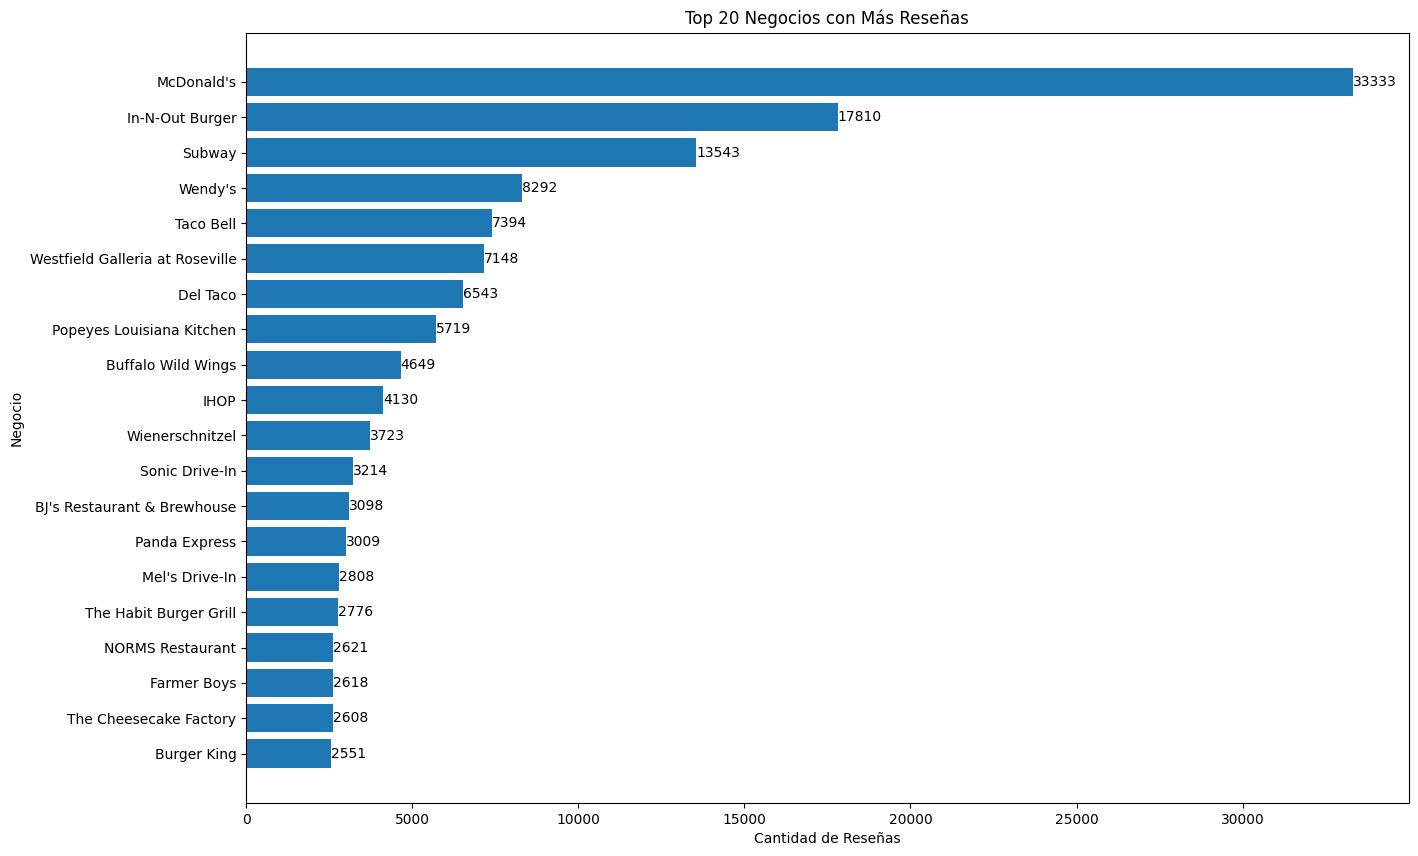

In [66]:
merged_df = pd.merge(df_rev, df_meta[['gmap_id', 'name']], on='gmap_id', how='left')

review_counts = merged_df.groupby('name_y')['text'].count().reset_index()
review_counts.columns = ['name', 'review_count']

# Ordenar por la cantidad de reseñas, de mayor a menor
review_counts = review_counts.sort_values(by='review_count', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 10))
bars = plt.barh(review_counts['name'].head(20), review_counts['review_count'].head(20))

# Añadir etiquetas con la cantidad de reseñas
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center')

plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Negocio')
plt.title('Top 20 Negocios con Más Reseñas')
plt.gca().invert_yaxis()
plt.show()

Dentro de los negocios con más reseñas, se observa que la franquicia McDonald's lidera el top 20. Por otro lado, se observan otras franquicias asociadas a comida rápida, cómida mexicana, entre otros. Esto indicaría la preferencia por franquicias y tipos de comida específica.

### Conclusiones

A partir del análisis exploratorio de los datos proporcionados por Google Maps, se determina que:

* Se encontro una cantidad relevante de datos nulos los cuales se realizaron estrategias para rellenarlos con datos correspondientes a cada columna.

* Existe una gran cantidad de reseñas en las cadenas de restaurantes por ser mas populares y poder recibir una mayor cantidad de clientes al dia. Un caso en particular es el de Mcdonald's que supera al segundo puesto por casi el doble de reseñas.

* Si bien predominan las calificaciones comprendidas de 3.5 a 4.5 estrellas. Se propone orientar las propuestas de mejora a los locales valorados entre 3 y 4 estrellas ya que presentan un mayor margen de crecimiento.

* Clientes con una muy buena experiencia en los locales, dejan mayor cantidad de reseñas con respecto a clientes insatisfechos. De esto se desprende que para aumentar la cantidad de reviews, es indispensable mejorar la calidad de servicio.